# Chapter 1. Spark 시작하기

* Last Updated on 202308_202009_201909_20181112_20180430_20171203_20160412
* 설치 PIP Pyspark 3.4.1(Java 20, Python3.9, 2023 <- Spark2.2 for Hadoop2.7 (Python 3.6x), Spark1.6 for Hadoop2.6

## 학습내용

빅데이터는 대량의 데이터를 의미한다. 기존의 기법이나 도구로는 분석하기에 불충분하다. Spark는 클러스터를 구성하여 빅데이터의 분산, 병렬처리 및 분석에 적합하다. Spark를 설치하고, 시작점인 SparkSession을 생성하여 시작해보자.

- 1.1 새삼 빅데이터
- 1.2 Spark 필요할까
- 1.3 프로젝트 디렉토리 구성
- 1.4 PIP Pyspark 설치
- 1.5 Spark 완전설치
- 1.6 Spark 실행 방식
- 1.7 IPython shell로 Spark사용하기
- 1.8 Jupyter Notebook으로 Spark 사용하기
- 1.9 Spark 설정

## 1.1 새삼 빅데이터

### 데이터사이언스

사전적으로 과학은 "**보편적인 진리나 법칙의 발견을 목적으로 한 체계적인 지식**"으로 정의하고 있다 (국립국어원 표준국어대사전). 이 관점에서 보면, 데이터과학이란 데이터를 수집, 처리, 분석하여 과학적으로 의미를 찾아내는 학문이라고 한다 (http://www.datascienceassn.org/code-of-conduct.html)
 
이런 역할을 오랫 동안 해오고 있는 학문이 있다. 통계학은 체계적, 과학적인 방법으로 가설을 정의하고 실험으로 증명하거나 이론을 세워 관찰을 하거나 데이터로부터 사실이나 법칙을 발견하고 있다.

왜 갑자기 데이터사이언스라는 과학이 필요한 것일까? 그 이유는 데이터의 성격이 과거와는 다르기 때문이다 (Dhar, 2013).

### 빅데이터가 뭐지

빅데이터는 말 그대로 대용량의 데이터를 의미하는 용어로, 기존 데이터베이스 도구나 기법으로 분석하기에는 뭔가 불충분한 정도의 규모나 복잡성을 가지고 있다.

빅데이터는 1997년 NASA의 한 연구원이 사용한 3V로 정의할 수 있는데, (1) 규모(Volume), (2) 속도(Velocity) 그리고 (3) 다양성(Variety)으로 설명할 수 있다.

* 첫째, 그 명칭만 봐도 알 수 있듯이, **규모가 크다**는 특징이 있다. 과거에는 메가바이트 정도의 크기라고 했다면, 저장용량도 커지면서 그 규모도 그 몇 천배 이상으로 증가했다. 특히 웹이 널리 쓰이면서 데이터 발생량이 급증하고 있다. SNS 건수를 봐도 억 단위를 넘어선지 오래다. 한국의 호적데이터는 가족의 관계데이터를 보관하는 특성 상 억 단위를 넘고 있고, 기존의 데이터베이스 기술로 관리되고 있다. **웹**에서는 이런 대량 데이터가 유투브, 트위터, Facebook 등 적지 않다.

* 또한 발생하는 **속도**가 빠르다. SNS는 문자메시지와 같이 매우 빠르게 공유된다. 버스운행, 날씨, 주가 등 발생하는 시점과 거의 동일하게 실시간 또는 거의 실시간으로 공유되는 특징이 있다.

* 또한 데이터가 발생하는 **출처가 다양**하다. 종전에는 '숫자'로 된 재무제표, 시계열 데이터 등 정량적 데이터, 이른바 'Hard Data'가 많았다면, 빅데이터의 경우는 그렇지 않다. SNS에 남겨지는 소문, 평판과 같은 'Soft Data'가 유용한 의미를 제공하기도 한다. 또한 동영상, 오디오, 문자, 센서 데이터, 또는 핸드폰에서 발생하는 다양한 디지털 지문 등 매우 다양한 형태로 발생하고, 과거 숫자 중심의 데이터에 비해 매우 이질적이다.

* 발생하는 출처가 다양하므로, 그 데이터 형식이 **비구조적**일 수 밖에 없다. 구조적 데이터, structured data는 필드가 있고, 각 필드에 대해 형식을 정해져 있다. SQL을 사용하여 데이터를 처리하면 편리하다. 스프레드쉬크와 같이 행, 열로 데이터를 구성할 수 있다.
    
메이커 | 색 | 가격 | 배기량
-----|-----|-----|-----
H | 검은색 | 3500 | 2000
B | 흰색 | 3000 | 2500

자동차를 메이커, 색, 가격, 배기량으로 분류하는 구조적 분석보다는 어느 메이커를 좋아하나, 왜 좋아하나 이른바 **입소문**에서 의미있는 데이터를 분석해내려는 노력이 있다. 이런 데이터는 비구조적이다.

### 새로운 방식의 분석

이런 데이터 성격은 사전처리, 즉 데이터를 미리 분석해 놓는 것이 큰 의미를 가지기 어려워졌다.
전통적인 방식의 데이터분석, 그러니까 여기서 말하는 데이터사이언스 이전에는 **전산실에 부탁**하면 데이터 처리과정을 거쳐 원하는 데이터를 사용자에게 넘겨주었다. 분기별 매출, 사용자 특성별 매출이익과 같은 예를 들 수 있다. 이 후 사용자가 컴퓨팅 능력이 생겨나면서, 즉 **EUC, End User Computing**을 통해 원시데이터를 직접 분석할 수도 있게 되었다. 사용자가 **엑셀을 사용해서, 분석, pivoting, graph 작업**을 하는 예이다.

데이터 사이언스는 말 그대로 '데이터를 처리한다'는 넓은 의미로 쓰이다가, 학문으로 '데이터 사이언스'라고 쓰이게 된 것은 90년대 중, 후반이다. 데이터사이언스에서 말하는 데이터 수집, 분석, 처리는 과거부터 존재했다. **BI** (Business Intelligence), **OLAP**, **데이터마이닝**, **기계학습** 등으로 데이터는 분석되어 왔다.

데이터사이언스는 수학, 통계, 컴퓨터과학, 정보과학, 경영학 등의 학습이 필요한 매우 **다학제적**이다 (Press, 2013). 한 마디로 매우 그럴듯하게 HBR에서 **21세기 The Sexiest Job** (Davenport & Patil, 2012)이라고 주장하고 있고 인력에 대한 수요도 늘어가고 있다. 이를 필요로 하는 업무가 늘어나고 있고 학위과정도 생겨나고 있다.

이와 같은 데이터처리는 새로 등장한 유행어인가? 그렇지 않다. 거래를 처리하는 OLTP OnLine Transaction Processing과 구분하여, 분석을 위한 **OLAP OnLine Analytical Processing**이 있다.
이런 OLAP 작업으로 데이터 웨어하우스 Data Warehouse, 데이터 마이닝 Data Mining이 있다.
또한 데이터웨어하우스를 구성하기 위해 **ETL (Extract, Transfrom and Load)** 작업이 필요하다.
**Extract**이란 다양한 입력에서 데이터 추출 (HDFS, files, JSON, DB, ...), **Transform**는 데이터 변환, **Load**는 다양한 형식의 저장 및 예측, 분류, 추천모델 등 지원하는 작업을 말한다.

빅데이터는 이런 과거의 작업에 비해, 특히 새로운 유형, 예를 들면 텍스트를 분석하려고 하며, 이런 데이터를 수집하고, 통계 및 머신러닝 기법을 통해 분석하는 것도 매우 중요한 작업의 하나이다. 이런 다양한 출처에서 실시간 발생하는 대량의 데이터에서 의미있는 통찰력이 있는 '집단지성'을 분석해내는 것이 '빅데이터'인 것이다.

> **OLAP** 온라인 분석처리
>
> OLAP은 온라인 분석처리 Online Analytical Processing의 약어로서, 데이터를 다차원으로 사전에 집계해 놓고 사용자 질의에 빠르게 대답할 수 있게 하고 있다. 매출의 예를 들어 요일별, 월별, 분기별로 **시간별** 합계를 별도의 실시간 처리없이 바로 볼 수 있게 하는 것이 좋은 예다. 또는 지역별, 부서별, 제품별로 구성하여 분석할 수 있다.

### 통계학과 비교

**모두 데이터를 분석** 한다는 공통점이 있다.

그러나 빅데이터는 다루는 **데이터의 양**에 차이가 있다. 컴퓨터 1대에서 처리할 수 없다. 분산해서 처리해야 한다. 또한 데이터의 성격도 통계학은 정량적, 정형적 데이터의 처리에 강점이 있는 반면 빅데이터는 댓글이나 트윗 등 비정혁적 텍스트를 처리하기 위해 노력한다.

통계학는 **샘플링을 해서 모집단을 추정**한다. 반면에 빅데이터는 샘플링보다는 전체를 대상으로 하는 경우가 보통이다.

구분 | 빅데이터 | 통계학
-----|-----|-----
목적 | 통찰, 예측 및 의사 결정에 활용 | 가설 검정, 신뢰 구간 추정
**데이터량** | 제한이 없다, 테라급 이상 | 제한이 있다 (대량이 아님)
**샘플** | 전체 | 표본, 설문, 추론 등
**분산처리** | Yes 대량 데이터이기 때문에 클러스터 컴퓨팅, 병렬 처리 필수적 | No
**대표적인 SW** | Hadoop, Spark | SAS, SPSS, Minitab
**데이터 형식** | 비정형, 텍스트, 센서 등 다양 | 정형, 숫자

### 데이터 분석의 절차

과학은 진실 또는 지식을 생산한다. 신문기사 역시 진실을 생산하지만, 과학은 아니다.
과학은 **과학적 절차**에 따라 그 과정이 실행되어야 한다.
즉 **과학적 의문이 먼저 제기**되어야 한다. 그리고 그 의문의 답에 필요한 데이터를 수집하고, 모델링 및 분석을 하고 답을 추론하는 과정이 뒤 따른다.

데이터사이언스 역시 과학적 절차에 따라 이루어져야 한다.
**문제를 정의하고, 그 문제를 해결해 나가는 과정이 과학적**으로 일어나야 한다.

데이터사이언스는 개인적 흥미에 따라 수행되기도 한다. 문득 어떤 문제가 궁금해서 데이터를 수집하고 답하는 노력을 들일 수 있다.
데이터사이언스는 보통 회사 또는 조직에서 어떤 목적을 가지고 실행된다. 공적인 목적으로 범죄를 예방하거나, 상업적인 신상품 개발이나, 정치적인 선거 예측 등이 모두 그렇다.
* 문제를 먼저 생각하고 가설을 설정한다. 이 문제를 풀면 어떤 business value가 향상되는지 답할 수 있어야 한다.
* 그리고 어떤 데이터를 수집해서, 분석할지 생각한다 (Simon, Mintzberg)

> business value
>
> 경영학에서 비지니스가치는 경쟁력을 향상시키는 어떠한 유무형의 가치를 의미하는 단어.
> **투자수익**, **사업이익** 등을 예로 들 수 있다. 또한 조직이 건강하려면 관리해야 할 정량 지표를 선별하여 balanced scorecard를 만들어 추적하기도 한다.

데이터과학는 문제를 풀어가는 절차로서 문제가 무엇인지, 그에 필요한 데이터를 수집하고 모델링하고 분석하여 결과를 시각화하는 단계를 거친다.

빅데이터를 분석하려면 다양한 도구를 조합하여 사용하는 것이 일반적이며, 도구의 특성상 여러 단계에 걸쳐 사용되는 경우가 많을 수 있다.

단계 | 설명 | 도구 예시
-----|-----|-----
문제정의 | 목적이 무엇인지, 문제를 정확히 이해하고,  1) 현상의 이해인지 또는 2) 예측인지? 종전과 달리 빅데이터로 풀면 더 통찰력을 얻는가?| 브레인스토밍
수집 | 문제해결에 어떤 데이터를 수집할 것인가? 어디서 수집할 것인지 그 방법은?<p>수집된 데이터가 빅데이터인가?<p>빅데이터는 그 **출처가 다양**하고, **실시간**으로 또한 **대량**으로 발생한다.<p>웹사이트를 **크롤링**하거나, **정부가 공개하는 데이터** 또는 **SNS**에서 데이터를 수집할 수 있다. 웹 데이터의 수집에 필요한 OAuth 인증과 REST API를 배워야 한다.| 크롤링, API (열린광장, SNS), Kafka(실시간 수집 및 처리)
정제 | 문제에 대한 답을 구하려면 수집된 데이터를 어떻게 구조화하는가? 필요한 정보항목 또는 속성을 **추출**하고, 분석에 필요한 구조로 **변환**하여 분석가능한 구조로 만들 수 있게 함 | 맵리듀스, transformer
저장 | 파일, DB, NoSQL | csv, MongoDB, Apache Cassandra,  HDFS(하둡 분산 파일 시스템)
분석 | 수집된 데이터를 어떻게 분석하는가? 단순 집계 또는 평균으로 충분한가? 통계분석, 추론, 머신러닝, 예측이 필요한가?  ETL에서 만들어진 빅데이터를 분석하기 위해서는 분산구조가 필요하게 된다. | knn, decision tree, nbayesian...
결과 보고 | 문제에 대한 결과 제시, 대시보드, 그래프, 시각화, 챠트 등 다양한 형식을 활용  | d3.js, Tableau, Power BI


## 1.2 Spark 필요할까

**Spark**가 왜 필요하지? 왜 배워야 하지? 이런 질문은 누구나 하게 된다.

답은 간단하다 - 빅데이터의 특징이 기존의 도구나 방법으로는 감당하기 불충분하니까, Spark가 필요하게 된 이유다.

Spark는 데이터 처리 및 분석을 위한 빠르고 유연한 엔진으로, 스트림 처리, 배치 처리, 머신 러닝 등 다양한 작업을 지원한다. 빅데이터는 필요한 컴퓨팅 자원을 확보하고 작업을 분산하고 병렬처리를 하고

빅데이터는 그 규모만 걱정하지 않는가 싶다. 오히려 규모가 큰만큼 필요한 컴퓨팅 자원이 많이 투입되어야 한다는 점이다. 처리하기 필요한 컴퓨팅 자원이  분산될 수도 저장소에 분산될 수 있고, 이는 Spark와 같은 분산 컴퓨팅이 필요하며, 분산 작업을 실패하지 않고 통합하는 등 제어하는 기능이 필수적이다.

대량의 데이터를 여러 컴퓨터에 나누어 처리하고, 집계하는 **맵리듀스 MapReduce**와 같은 알고리즘 뿐만 아니라, 머신러닝, 시각화 등 필요한 API가 제공되고 있다.

ChatGPT에게 Spark가 필요한 이유를 물었다. Spark의 기술적 수월성 다양한 데이터의 빅데이터 처리에 필요한 머신러닝, 알고리즘, 도구를 제공한다는 것 외에도 흥미있는 이유를 제시하고 있다. 바로 커뮤니티가 활발하고, 새로운 기능과 업데이트가 빈번하고, 산업적 수요가 있어 취업기회가 확장된다.

ChatGPT에게 "Spark가 앞으로 유망할 것인지" 물어보자. "스파크는 현재까지의 기술과 사용 사례를 고려할 때 매우 유망한 도구로 평가된다"는 답이 돌아왔다.


### 1.2.1 Hadoop과 Spark

Hadoop은 데이터가 대량으로 증가하면서, 이를 처리하기 위한 자바 기반의 오픈 소스 분산 플랫폼으로, 대용량 데이터를 **수집**하고 병렬 처리하기 위해 사용되고 있다.

Hadoop은 애플리케이션, 자원관리, 스토리지 계층으로 구성된다.

* 애플리케이션 계층 - Hadoop MapReduce
* 자원관리 계층 - Hadoop YARN (하둡의 컴퓨팅 자원, 작업 일정 관리) 
* 스토리지 계층 - Hadoop HDFS (하둡의 파일 시스템)

Hadoop 자체의 파일시스템 HDFS (Hadoop Distributed File System)를 제공하고 있고,
HDFS에서 데이터를 읽어 **맵리듀스 MapReduce** 작업으로 데이터를 추출, 가공할 수 있다. MapReduce는 Hadoop 이전에도 이미 여러 언어로 개발되어 사용되고 있었지만, 분산환경에서 많이 쓰이는 오픈소스로 Hadoop의 MapReduce가 많이 사용되고 있다.
기계학습을 하려면, 데이터를 HDFS로 올려 놓고, 자바 라이브러리인 Mahout 또는 Spark의 Machine Learning 라이브러리를 사용해야 한다.

Hadoop은 클라이언트-서버 방식으로 운영되며, YARN  (Yet Another Resource Negotiator)은 아키텍처의 스토리지계층 위에 위치하여 클러스터 노드들의 CPU, 메모리 등의 컴퓨팅 자원을 할당하고, 작업 일정을 계획하고, 작업을 지시하고, 작업이 잘 진행되는지 보고, 장애가 발생할 경우 대처하는 등의 기능을 수행하게 된다.

Hadoop MapReduce에서 자원 및 일정관리 부분을 떼어내어 분리해내서 
MapReduce 2 또는 NextGen MapReduce이라고 하고, Hadoop을 MapReduce를 단일 배치처리하는 경우에서 벗어나, 여러 작업을 동적으로 처리할 수 있도록 만들고 있다.


최근에는 Spark의 사용이 늘어나고 있어서 Hadoop과 비교되고 있다.
반면 Spark는 수집한 데이터를 **분석**하는 용도로 사용된다.
* 자체 파일 시스템이 없고, RDD를 통해 Hadoop의 파일시스템 HDFS를 사용할 수 있다.
* Spark는 Machine Learning 라이브러리를 가지고 있다.
* Hadoop과 달리 메모리에서 처리하기 때문에 빠르다 (pipeline). 배치 처리 뿐만 아니라 실시간 스트리밍 처리, 대화식 쿼리, 머신 러닝, 그래프 처리 등 다양한 작업에 유연하게 사용

구분 | Spark | Hadoop
-------|-------|-------
주된 사용 목적 | 대화식 분석, 스트리밍 처리, 머신러닝 | 데이터 수집, 맵리듀스 배치처리
파일 시스템 | 자체 파일 시스템이 없슴. hdfs, db, csv등을 사용 | hdfs
속도 | 인메모리 파이프라인을 사용하므로 빠름 | 디스크를 사용하므로 보다 느림
언어지원 | 자바, 스칼라, 파이썬, R | 주로 자바 (다른 언어를 사용하기 위해서는 Hadoop Streaming 활용

### 1.2.2 Spark 프레임워크

Spark는 2009년 처음 등장하고, 10여년 넘게 버전업을 하면서 널리 이용되고 있다.
현재 처음에 관여했던 개발자가 **Databricks**를 설립해서 관리하고 있다.
* 2009년 UC Berkeley에서 Matei Zaharia가 박사학위 과정에서 개뱔
* 2010년 BSD 라이센스 오픈소스로 전환. Apache Mesos 위에 Spark를 구축.
* 2013년 Apache 2.0의 license로 전환. Spark는 Apache Project
* 2014년 5월 1.0 발표
* 2020년 6월 3.0 발표

#### 기능

Spark는 실시간 대용량 데이터 처리를 위한 클러스터 컴퓨팅 프레임워크로서, API를 사용해서 데이터를 읽고, 변환, 통계처리, 기계학습, 그래프분석을 할 수 있다.
**Scala**로 개발되어 jvm에서 실행한다. 그러나 Scala, Java, Python, R 여러 언어를 섞어서 할 수 있는 다중언어환경(polyglot) 을 제공한다.
쉘 환경에서 **REPL (Read Eval Print Loop)**이 가능해서 배우기 쉽고 편리하다. Standalone으로 시작할 수 있고, 클러스터 환경에서 실행할 수도 있다.
아래 표에서 보듯이 **Spark Core**가 분산작업에 필요한 바탕이 되고, 그 위 **Sql, streaming, mllib, graphx**를 제공한다.
    
구분 | 구성 | 설명
-------|-------|-------
Spark engine | Spark Core | 작업배분, 입출력 등 분산작업에 필요한 기능
Spark Applicaiton Frameworks | Spark SQL | DataFrames
| Spark Streaming | 실시간 처리
| MLlib | 머신러닝 (참조 scikit-learn)
|GraphX | 그래프 분석

> **클러스터**

> 컴퓨터 클러스터 (computer cluster)는 여러 컴퓨터들이 연결되어 하나의 시스템처럼 동작하는 체계를 말한다.
컴퓨터들을 노드라고 하며, 이를 서로 통신망으로 연결이 되며, 시스템적으로 작동하기 위해 클러스터 관리자가 있어야 한다.
> - 클러스터 노드 : 프로세싱 자원을 제공하는 시스템
> - 클러스터 관리자 : 노드를 서로 연결하여 단일 시스템처럼 보이게 만드는 로직을 제공. 작업 스케쥴링과 장애가 발생했을 경우 대응 


#### 아키텍쳐

클러스터는 여러 컴퓨터들이 연결되어 하나의 시스템처럼 협업하는 체계로서, 몇 개부터 수천 개로 구성할 수 있기 때문에 대규모 데이터 처리와 분석을 위한 분산 컴퓨팅 아키텍쳐로 적합하다.

여러 컴퓨터의 협업이므로, 일반적으로 단일 컴퓨터보다 더 뛰어난 성능과 안정성을 제공하며, 비슷한 성능과 안정성을 제공하는 단일 컴퓨터보다 비용 면에서 훨씬 더 효율적이다.

Spark는 Master-Slave 아키텍처에 따라, 중앙에 하나의 Driver가 있고, 여러 Worker가 분산되어 있고 이를 통해서 작업이 실행된다.

* (1) 마스터

- Cluster Manager가 애플리케이션 실행하기 위해 어떤 작업을 어떤 워커 노드가 실행할지 작업일정을 관리하고, CPU나 메모리등 필요한 자원을 배분한다. Cluster Manager의 종류는:

    * Standalone: 로컬에서 사용하는 경우이고 ```--master local```, 최대 CPU를 사용하려면 ```--master local[*]``` 특정 호스트와 포트에서 실행하려면 ```--master spark://hostname:port``` 설정.
    * YARN: 초기에는 하둡의 맵리듀스 작업을 위해 개발되었지만, 이후 하둡 2세대에 확장해서 적용, 클러스터 관리자 ```--master yarn``` 이라고 설정)
    * Apache Mesos: 자원 공유를 중심으로 설계된 클러스터 관리자. 특정 호스트와 포트에 설치된 mesos를 사용하려면```--master mesos://hostname:port```
    * Kubernetes:  클라우드 환경 내 컨테이너화된 응용 프로그램의 오픈 소스 플랫폼 ```--master k8s://<kubernetes-apiserver>```

* (2) Worker

    - 클러스터 매니저의 지시에 따라 작업을 수행하고 결과를 드라이버로 보내는 역할,
    - Executor를 가지고 있고, 실제 데이터 처리 Task(작업을 나눈 실행 단위)를 병렬 실행한다.

* (3) Driver

    - 클라이언트 측에서 실행하고, 클러스터 매니저와 통신하여 애플리케이션의 실행 계획을 정의하고 작업을 분배하는 역할,
    - 작업은 워커 노드에게 요청하고, 결과를 돌려받는다.
    - Scala, Java, Python 언어이든 애플리케이션의 main() 함수와 같은 지시/통제 역할을 수행한다.

스파크 클러스터에서 수행되는 작업을 예를 들어 설명해보자. 예를 들어, ```spark-submit --master <Spark master URL> --driver-memory 5g --executor-memory 7g --executor-cores 2 myApp.py```라고 작업이 시작되었다고 하자.

1. 클라이언트 측에서 드라이버 프로그램을 실행한다.

- 드라이버(SparkSession)는 마스터 노드의 클러스터 매니저와 통신하여 컴퓨팅 자원을 할당받고 작업을 계획한다.

2. 마스터 노드에 요청

- 드라이버가 클러스터 매니저에게 myApp 실행을 요청하고, 클러스터 매니저는 마스터 노드에 이를 통보한다.
- 마스터 노드는 클러스터 내의 리소스 상태와 우선순위에 따라 어떤 작업을 어떤 워커 노드에서 실행할지 작업 일정을 결정한다.

3. 워커 노드 실행

- 작업 일정에 따라 마스터 노드가 워커 노드에게 작업을 지시하고, 워커 노드는 그 작업을 수행한다. 작업은 하나 이상의 태스크(Task)로 분할되어 각 Executor에서 병렬로 실행된다.
- 각 Executor는 할당받은 태스크를 실행하고 결과를 생성한다. 데이터를 로드하고 처리하며, 중간 결과를 메모리에 저장하고 다른 Executor와 상호작용하기도 한다.

4. 마스터 노드로 작업 결과 전송
- Executor가 작업을 완료하면 결과는 마스터 노드로 전송된다. 마스터 노드는 작업 결과를 드라이버 프로그램으로 수집한다.

5. 드라이버 결과 처리

- 드라이버 프로그램은 작업 결과를 받아 데이터 처리 및 분석을 수행한다.

6. 애플리케이션 종료

- 작업이 모두 완료되면 클러스터 매니저에게 할당받은 리소스를 반환하고, 마스터와 워커 노드에서 실행되던 프로세스들이 종료된다.
- myApp이 종료한다.


In [1]:
import iplantuml

In [3]:
%load_ext iplantuml

The iplantuml module is not an IPython extension.


In [4]:
%%plantuml --jar
@startuml
node Driver
node Cluster_Manager {
    node Master
}
node Cluster_Worker_1 {
    node Executor_1_1 {
        rectangle Task_1_1_1
    }
}
node Cluster_Worker_2 {
    node Executor_2_1 {
        rectangle Task_2_1_1
    }
}
node Cluster_Worker_n {
    node Executor_n_1 {
        rectangle Task_n_1_1
    }
}

Driver --> Cluster_Manager : (1) Driver는 Cluster Manager에게\nExecutor를 실행하는데 필요한\n 컴퓨팅 자원을 요청한다.
Driver --> Executor_1_1 : (3) Driver는 필요한 Task가 무엇인지 정하고,\n 작업 계획을 하고,\n Executor에 Task를 할당
Executor_1_1 --> Driver : (4) Executor는 작업을 실행하고, \n종료하면 그 결과를 Driver에게 반환
Cluster_Manager -down-> Cluster_Worker_1
Cluster_Manager -down-> Cluster_Worker_2
Cluster_Manager -down-> Cluster_Worker_n : (2) Cluster Manager가 Driver를 대신해\n Executor를 실행한다.
Driver --> Driver : (5) 모든 작업이 종료되면, Driver의 main() 함수가 종료, sparkSession.stop()이 호출된다.\n (6) Spark는 Cluster Manager에게 할당되었던 자원을 회수한다.
@enduml 

## 1.3 프로젝트 디렉토리 구성

최상위 디렉토리 'Code'를 먼저 만든다. 보통 ```Documents```라는 문서 디렉토리가 있듯이, 개발자는 소스코드를 'Code'에 저장하자.

* 'Code' 아래 **프로젝트 디렉토리**를 만든다. 학번으로 하는 편이 좋다. 이 디렉토리를 줄여서 PJT_DIR이라고 표기한다.
* **프로젝트 디렉토리** 아래 'src' 디렉토리를 만들고, **소스코드 파일**들을 저장한다.
* 'data' 디렉토리는 csv, txt 등 데이터 파일 저장한다.

**주의**: 경로 어디에도 **한글**은 사용하지 않는 편으로 하자. 자바 18부터 유니코드를 지원한다고 해도, 윈도우 사용자 계정 (예:C:/Users/홍길동), 한글로 된 디렉토리명을 사용하면 오류가 발생할 수 있다. Spark를 사용하면서 한글 사용자 계정이 문제가 되었고, 나중에 인증키를 읽는 getKey()를 하면서도 한글명의 디렉토리로 인해 오류가 발생하곤 한다.

```python
C:\Users\G305\Code\201711111\ 리눅스는 '/home/user/Code/201711111
         |
         |
         d0_intro.ipynb
         |
         ---> data\
         |
         ---> src\
                |
                ---> Hello.py
         |
         |---> spark-warehouse Spark 실행하면 자동으로 생성
```

## 1.4 PIP PySpark 설치

설치는 크게 나누면 2가지, 그 중 한 방법을 선택할 수 있다.

* (1) PIP 설치: Python PIP에서 설치하는 방법은 PySpark 버전 2.2부터 가능해졌다. 그 전에는 '완전 설치'만 가능했다.
* (2) 또는 이른바 '완전 설치'는 Spark 전체를 내려받아 설치할 수 있지만, 아무래도 조금 번거로울 수 있다.

(1)은 간편한 반면, 로컬에서 작동될 뿐 Spark의 분산처리와 같은 본연의 기능을 누리지 못한다는 점은 양보해야 한다. 배우는 단계에서는 (1)의 방식으로 설치하고 로컬에서 해도 작동을 익히기에 충분하다. 실전에서 Spark의 분산 병렬 처리 능력을 충분히 활용하기 위해서는 (2) 완전 설치가 필요한 시점이 올 것이다.

(1) 또는 (2) 어느 설치를 선택하더라도, Python, Java의 사전 설치는 꼭 필요하다.

### 1.4.1 사전 설치

Spark는 멀티언어를 지원해서, 다양한 프로그래밍 언어 가운데 자신이 원하는 것을 선택하여 사용할 수 있다.

PySpark는 당연히 Python이 필요하고, 자바 역시 필요하다. 설치하는 버전은 자신이 사용하는 Spark의 배포시기를 감안해야 한다. 혹시라도 앞 선 버전의 후방호환 문제가 있을 수 있으니, **Spark 배포시기 이전에 발표된 Java, Python**으로 설치하자. Scala를 사용한다면 당연히 미리 설치가 필요하겠다.

구분 | Pyspark를 사용하려면 | 설명
----|-----|-----
Java | 필수 | Java SE Development Kit을 설치. **Spark 3은 Java 11** 지원. (**Spark 2에서는 Java 7+, 8**이 무난)
Python | 필수 | Spark 3.0은 Python 2 지원 중지, Python 3 필요 (Spark 2에서는 Python 2.6+/3/4+)
Scala | 선택 (Scala사용하는 경우 필수) | Spark 3.0은 Scala 2.12 (Spark 2에서는 Scala 2.11.x)<br>리눅스 ```sudo apt install scala```<br>윈도우 scala-2.xx.x.msi 다운로드, 설치 및 환경설정 https://www.scala-lang.org/download/

#### (1) python 설치

컴퓨터에 파이썬이 설치되어 있는 경우도 많아, 그렇다면 건너띄어도 된다. 설치를 확인하려면 ```python --version```이라고 해보자. 혹시 Python 2가 설치되었으면, 지원이 끊어졌으니 이제 Python 3을 사용한다.

```
C:\Users\jsl>python --version //또는 python3 --version
Python 3.9.1
```

윈도우 사용자는 파이썬 공식 페이지로 가서 내려 받고 설치한다 (https://www.python.org/downloads) (맥은 brew, 리눅스는 apt 설치관리자를 이용하도록 한다)

pyspark와 같은 라이브러리를 설치하기 위해서는 pip가 필수인데, Python을 설치하면 동반 설치되어 있다. 버전 업그레이드를 위해, 명령창에서 ```pip install pip --upgrade``` 를 실행하자.

참고로 python3는 python3.X과 같은 버전, 즉 python3을 호출하면 python3.X을 호출한다.
python3에 pip install pyspark로 설치해도 소용없다. pip는 python2에 설치하게 되고, pip3는 python3에 설치한다.
개인마다 상황이 서로 다를 수 있으니, 자신이 어떤 버전을 사용하는지 주의해야 한다.

* 참고로 윈도우에서는 Anaconda를 설치하면 무겁지만 편리하여 꽤 빈번하다. 홈페이지로 가서 내려받아 설치하면 된다 (http://docs.continuum.io/anaconda/install). Python 3.x를 지원하는 버전으로 선택하도록 한다. 설치하고 나면, 윈도우 메뉴에서 Anaconda를 선택하여 실행한다. Anaconda에는 명령창을 제공하는데, 여기서 ```pip```, ```conda``` 명령을 사용할 수 있다.

##### Jupyter notebook 설치

Spark에서 제공하는 pyspark 프롬프트 (```pyspark >>>```)가 있기는 하지만, Jupyter Notebook를 쓰는 편이 그 환경에서 pyspark를 실행하면 얼마나 편리한지 곧 알게된다.

* ```pip install notebook``` 하면 된다. ```pip install jupyterlab``` (그리고 실행하려면 ```jupyter lab```)

* 참고로 혹시 Anaconda를 설치한 경우, 시작 디렉토리를 변경하지 않으면 번거롭다. 변경하기 위해서는 Anaconda 명령창에서 ```jupyter notebook –generate-config```를 타이핑하고 엔터를 누른다. 그러면 ```C:\Users\username\.jupyter\jupyter_notebook_config.py```가 생성된다. 이 파일을 열고 ```#c.NotebookApp.notebook_dir = ''``` 이 부분을 ```c.NotebookApp.notebook_dir = '/path/to/home/dir/'```로 변경해 주면 된다.

#### (2) jdk 설치

PySpark는 Java를 필요로 하므로, 이제 jdk가 설치되어 있어야 한다.
Oracle jdk 또는 openjdk를 설치한 후, pyspark를 설치해야 한다.

오라클 Java를 설치해도 좋지만 오픈이 아니어서, OpenJDK를 설치한다. JDK가 설치되어 있다면 버전만 확인하자.

윈도우에서는 내려받아 설치하면 된다 (맥은 brew, 리눅스는 apt로 설치하자
```
jsl@DESKTOP$ sudo apt install openjdk-11-jdk-headless (headless는 draw 없는 거)
설치하면, update-alternatives --config java로 설정까지 변경함
```

jdk의 버전은 11을 설치해도 좋다.
jdk 최신버전은 pyspark 버전과 시차가 있다면, 그러니까 pyspark 발표 후 자바가 발표되는 경우에는 어울리지 않을 수 있으니 감안해서 최신의 버전은 지양하는 편이 좋겠다. 단, Spark가 2.x이면 jdk 8을 설치한다.

설치하고 나서, 버전을 확인하자. 간혹 JVM JRE이 설치되어 있어서, java 버전만 출력되는 경우도 흔하게 볼 수 있다. java, javac 모두 버전을 출력해야 하며, 버전은 일치해야 한다.

```
PJT_DIR>javac --version
javac 20.0.2

PJT_DIR>java --version
openjdk 20.0.2 2023-07-18
OpenJDK Runtime Environment (build 20.0.2+9-78)
OpenJDK 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
```


![alt text](figures/2_pysparkNowAvailableFromSpark2_2.png "pyspark now available from spark 2.2")

### 1.4.2 pyspark 설치

pyspark만 설치하게 되면, 단독형 standalone으로만 사용할 수 있다.
완전 설치의 Spark는 다음 장에서 조금 어렵지만 해보자 (건너뛰고 필요 시 해도 된다).

이제는 PySpark를 PIP로 설치해보자.

```pip install pyspark``` 해주면, 다음과 같이 PySpark와 Py4j (Python이 자바의 jar 라이브러리를 사용하기 위해 필요한 라이브러리이다. Py4j가 미설치되면, 오류 발생 "Java gateway process exited before sending its port number". 혹시 미설치로 판단되면, 별도로 ```pip install py4j``` 해주면 된다)

```
C:\Users\jsl>pip install pyspark
Defaulting to user installation because normal site-packages is not writeable
Collecting pyspark
  Downloading pyspark-3.4.1.tar.gz (310.8 MB)
     ---------------------------------------- 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Collecting py4j==0.10.9.7     ---> py4j도 동반해서 설치된다.
  Downloading py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
     ---------------------------------------- 200.5/200.5 kB 11.9 MB/s eta 0:00:00
Building wheels for collected packages: pyspark
  Building wheel for pyspark (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285436 sha256=873f64a9f166cc930939af6ed173d1648254b378c822c48b8cbf3cc718a985e6
  Stored in directory: c:\users\jsl\appdata\local\pip\cache\wheels\1b\af\96\d8765d96e36845bac6659c4ca726f595f44056571cb54fd16c
Successfully built pyspark
Installing collected packages: py4j, pyspark
Successfully installed py4j-0.10.9.7 pyspark-3.4.1
```

### 윈도우를 사용한다면 winutils가 필요

윈도우 사용자는 Spark를 사용하려면, 필요한 작업이 하나 더 있다. PySpark를 PIP에서 설치하는 경우에는 필요하지 않을 수도 있다 (경고라서 무시할 수도 있겠다 ```WARN: Did not find winutils.exe: java.io.FileNotFoundException```).

```winutils.exe```, ```hadoop.dll```를 내려받아서 ```HADOOP_HOME%\bin\```아래 복사해 넣어준다. ```HADOOP_HOME```이 만들어져 있다면, 그냥 PySpark 경로 (윈도우 명령창에서 ```where pyspark```하면 출력된다)에 넣어도 가능하다.

> **winutils.exe**

> Spark는 Hadoop 기반으로 작동하고, Hadoop은 윈도우 운영체제에서 윈도우가 아닌 클러스터에서 작동하기 위해 필요한 실행파일이다.
> 이 파일은 주로 윈도우 파일시스템을 사용할 경우 필요한데,
> Hadoop에서는 윈도우API를 사용하면서 posix 파일 권한을 사용하기 때문이다 (```org.apache.hadoop.util.Shell```).
> HADOOP.DLL and WINUTILS.EXE 이 파일들에 그 기능들이 구현되어 있다.
> 따라서 %HADOOP_HOME%\bin\winutils.exe가 반드시 경로에 있어야 한다.
> 설치하고 나면, 명령창에서 winutils 명령어를 포함해서 (윈도우에서 불가능한) 리눅스 명령어 chmod를 실행할 수 있다.

```
static final String WINUTILS_EXE = "winutils.exe";
...
static {
  if (WINDOWS) {
      file = getQualifiedBin(WINUTILS_EXE);
      path = file.getCanonicalPath();
      ioe = null;
    } else {
    ioe = new FileNotFoundException(E_NOT_A_WINDOWS_SYSTEM);
  }
  WINUTILS_PATH = path;
  WINUTILS_FILE = file;
  WINUTILS = path;
  WINUTILS_FAILURE = ioe;
}
...
```

### 1.4.3 테스트 실행

pyspark가 설치되고 실행하면, 리눅스나 윈도우 모두 비슷한 화면이 ```Spark``` 로고와 함께  출력된다.

```
C:\Users\jsl>pyspark --version
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.4.1                     <-- 버전 3.4.1을 출력
      /_/

Using Scala version 2.12.17, OpenJDK 64-Bit Server VM, 20.0.2   <-- 자바 버전을 인식하여 출력
Branch HEAD
Compiled by user centos on 2023-06-19T23:01:01Z
Revision 6b1ff22dde1ead51cbf370be6e48a802daae58b6
Url https://github.com/apache/spark
Type --help for more information.
```

Jupter Notebook에서 선택한 Python 버전을 출력해보자. sys 모듈의 version을 출력하면 된다.

In [43]:
import sys
print(sys.version) # 자신이 사용하는 python 버전과 동일한지 확인한다.

3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]


In [44]:
!python --version

Python 3.9.1


In [45]:
!python3 --version

Python 3.9.1


이제 pyspark를 사용할 수 있도록 해보자. 
```import pyspark``` 명령이 오류없이 실행되었다면, 제공하는 라이브러리가 사용가능 단계로 장착이 되었다는 의미이다.

In [46]:
import pyspark

### 멀티 버전의 문제: Python3를 찾지 못하는 경우

PySpark는 내부적으로 자체 Python 환경을 사용한다. 복수의 Python이 설치되어 있으면 어느 것을 실행해야 할지 모르는 경우가 발생한다.

Python2와 3이 같이 설치되어 있는 경우 별도 명령어가 python, python3 이렇게 존재하면 문제가 없다. 예를 들어, 다른 버전을 동일한 ```python.exe```로 되어 있는 경우에도 문제가 된다.

```
PJT_DIR> where python # 리눅스에서는 which python (또는 whereis python)
C:\Program Files\Python39\python.exe     ---> Python 3.9의 명령어도 python.exe로 되어 있다.
C:\Users\jsl\.windows-build-tools\python27\python.exe
```

#### 윈도우에서 mlink로 명령어를 만들어 준다

관리자 명령창을 열어서, Python 3.9가 설치된 디렉토리로 이동하고 나서 해야 명령어가 단순해진다.

```
c:\Program Files\Python39>mklink python3.exe python.exe
symbolic link created for python3.exe <<===>> python.exe
```

#### 환경변수 ```PYSPARK_PYTHON=python3```, ```PYSPARK_DRIVER_PYTHON``` 경로를 설정해도 된다.

PYSPARK_PYTHON (Spark의 드라이버가 필요한 Python 경로), PYSPARK_DRIVER_PYTHON (Spark의 Worker가 필요한 Python 경로)를 지정해주어도 멀티버전 문제는 해결된다.

Python 2와 3이 같이 설치되어 있는 경우에는, 아래에서 보듯이 ```PYSPARK_PYTHON=python3```, ```PYSPARK_DRIVER_PYTHON=python3```이라고 경로 설정을 해주어야 한다. 명령창에서 ```whereis python```, ```whereis ipython```,
또는 자신이 ```python3```을 사용하면 ```whereis python3```라고 확인하고 그 경로를 넣어주어야 한다.

또는 주피터 노트북에서 설정해도 된다.

```
import os
os.environ["PYSPARK_PYTHON"]="C:\\Program Files (x86)\\Python37-32\\python.exe" (윈도우의 경우 백슬래시 2개)
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Program Files (x86)\\Python37-32\python.exe"
```

또는 sys.executable을 지정해주어도 된다. 이 변수는 현재 실행되고 있는 Python 인터프리터의 경로를 가지고 있다.

```
import os
os.environ["PYSPARK_PYTHON"]=sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"]=sys.executable
```

또는 완전설치의 경우에는 ```spark-env.sh``` 파일이 있게 되는데, 이를 열어 환경변수를 설정한다.
```python
$ vi $SPARK_HOME/conf/spark-env.sh

export PYSPARK_PYTHON=python3
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS="notebook"
```

환경변수 PYSPARK_PYTHON, PYSPARK_DRIVER_PYTHON 설정해 보자.
pyspark에서 사용하는 버전이 sys.executable과 일치하는지 확인하자.

In [19]:
import sys
print(sys.executable)

/usr/bin/python3


In [20]:
import os
os.environ['PYSPARK_PYTHON']=sys.executable
os.environ['PYSPARK_DRIVER_PYTHON']=sys.executable

In [ ]:
jsl@jsl-smu:~$ export PYSPARK_PYTHON=python3
jsl@jsl-smu:~$ pyspark 
Python 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
20/08/26 07:03:13 WARN Utils: Your hostname, jsl-smu resolves to a loopback address: 127.0.1.1; using 117.16.44.45 instead (on interface eth0)
20/08/26 07:03:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
WARNING: An illegal reflective access operation has occurred
WARNING: Illegal reflective access by org.apache.spark.unsafe.Platform (file:/home/jsl/.local/lib/python3.6/site-packages/pyspark/jars/spark-unsafe_2.12-3.0.0.jar) to constructor java.nio.DirectByteBuffer(long,int)
WARNING: Please consider reporting this to the maintainers of org.apache.spark.unsafe.Platform
WARNING: Use --illegal-access=warn to enable warnings of further illegal reflective access operations
WARNING: All illegal access operations will be denied in a future release
20/08/26 07:03:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.0.0
      /_/

Using Python version 3.6.9 (default, Apr 18 2020 01:56:04)
SparkSession available as 'spark'.
>>> 

### PIP pyspark은 어디에 설치? SPARK_HOME, py4j-0.x.x-src.zip, pyspark.zip은 어디에?


아래 경로에 설치된 python 라이브러리는 자동 인식된다.

윈도우에서 PIP 설치는 ```pythonXX/site-packages```에 하고, ```sys.path```에서 그 디렉토리를 인식하고 있다.
그래서 호출이 가능하기도 하다.

그러나 압축파일을 푸는 것처럼 필요한 파일과 디렉토리들이 여기 저기 설치가 된다. (1) pyspark와 자바 통신을 위한 py4j 라이브러리, (2) pyspark 라이브러리, (3) 필요한 jar 파일은 /pythonXX/site-packages/pyspark/jars에 설치되어 있다.

설치되어 있는 현황을 표로 정리하면 다음과 같다.

위치 | 어떤 파일 (디렉토리)이 설치되어 있는가
-----|-----
SPARK_HOME | "..pythonXX\site-packages\pyspark\pyspark" 디렉토리. 이 밑에 bin, examples, jars, ml, mllib 디렉토리가 있다.
SPARK_HOME/bin | 여기에도 pyspark.cmd가 있다. 그 외 find-spark-home, spark-submit, load-spark-env.sh 등
```SPARK_HOME/python/lib``` | ```py4j-0.x.x-src.zip```과 ```pyspark.zip```이 설치
```SPARK_HOME/pyspark/jars``` | 여러 jar 파일이 저장되어 있다.


#### (1) ```SPARK_HOME```은 PIP pyspark가 설치된 디렉토리로 인식된다.

```SPARK_HOME```은 ```site-packages```아래 pyspark가 된다.

- 윈도우는 ```AppData\Roaming\Python\Python39\site-packages```
- Ubuntu는 ```site-packages``` 대신 ```dist-packages```를 사용한다, 예: '/usr/local/lib/python3.6/dist-packages', 로컬로 설치되면, ```/home/jsl/.local/lib/python3.6/site-packages```

그 아래 pyspark가 있고 그 디렉토리를 ```SPARK_HOME```으로 인식한다.
```SPARK_HOME/bin``` 아래 ```find-spark-home.cmd, load-spark-env.sh, pyspark.cmd, spark-submit...``` 등이 설치되어 있다.

프로그램으로 찾아 보자. ```pythonXX/site-packages```를 확인하기 위해 사용되는 함수를 보자.

- site.getsitepackages(): 프로젝트들이 공통적으로 사용하는 외부 라이브러리 (글로벌)가 설치되는 경로
- sys.path()는 전체를 출력한다. 라이브러리 뿐만 아니라 사용자가 작성한 모듈 경로도 추가할 수 있다.

In [16]:
import site, sys
#site.getsitepackages()
sys.path

['C:\\Users\\jsl\\Code\\201711111',
 'c:\\program files\\python39\\python39.zip',
 'c:\\program files\\python39\\DLLs',
 'c:\\program files\\python39\\lib',
 'c:\\program files\\python39',
 '',
 'C:\\Users\\jsl\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\jsl\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32',
 'C:\\Users\\jsl\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\jsl\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'c:\\program files\\python39\\lib\\site-packages']

위 경로를 모두 뒤져본다. pyspark는 7번째(인덱스 6)에서 발견된다.
pyspark 디렉토리가 있으면, 그 곳이 SPARK_HOME이 된다.

- 윈도우 C:\Users\jsl\AppData\Roaming\Python\Python39\site-packages 로컬로 설치하니 AppData 아래에 존재 (글로벌로 하면 물론 program files 하위 폴더에 할 수 있다)
- 리눅스 /usr/local/bin/python3.6/dist-packages/pyspark

그 밑으로 필요한 lib, jars 등 필요한 디렉토리들도 모두 반갑게 볼 수 있다.

In [17]:
sparkHome=sys.path[6]

In [19]:
f"SPARK_HOME: {sparkHome}\pyspark"

'SPARK_HOME: C:\\Users\\jsl\\AppData\\Roaming\\Python\\Python39\\site-packages\\pyspark'

그 아래 bin을 열어보면 pyspark.cmd 뿐만 아니라, spark-submit이 설치되어 있다.
또한 find-spark-home.cmd, load-spark-env.sh도 여기에 설치되어 있다.


#### (2) ```py4j-0.x.x-src.zip```과 ```pyspark.zip```

```SPARK_HOME/python/lib``` 아래 ```py4j-0.x.x-src.zip```과 ```pyspark.zip```이 설치되어 있다.

* 윈도우: 나만 사용하는 로컬로 설치한 경우 ```c:\Users\jsl\AppData\Roaming\Python\Python39\site-packages\pyspark\python\lib>```
* 리눅스: ```/usr/local/lib/python3.6/dist-packages/pyspark/python/lib```
* 아나콘다 ```C:\Program Files\Anaconda3``` 여기에 설치하면 ```C:\\Program Files\\Anaconda3\\lib\\site-packages```

따라서 필요하면, 그 경로를 설정해주면 된다.
```
os.environ['SPARK_HOME'] = 위에서 설명한 spark home 디렉토리 (```spark home```이라고 하자)
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.9-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))
```

그 아래 SPARK_HOME/python/lib을 뒤져본다. 그러면 그 안에 아래와 같이 py4j-0.10.9-src.zip, pyspark.zip 파일이 설치되어 있다 (리눅스는 !dir /usr/local/lib/python3.6/dist-packages/pyspark/python/lib/*.zip)

In [6]:
!dir c:\Users\jsl\AppData\Roaming\Python\Python39\site-packages\pyspark\python\lib

 Volume in drive C is OS
 Volume Serial Number is 0A68-2B27

 Directory of c:\Users\jsl\AppData\Roaming\Python\Python39\site-packages\pyspark\python\lib

07/29/2023  05:25 PM    <DIR>          .
07/29/2023  05:25 PM    <DIR>          ..
07/29/2023  05:25 PM            42,424 py4j-0.10.9.7-src.zip
07/29/2023  05:25 PM         1,979,365 pyspark.zip
               2 File(s)      2,021,789 bytes
               2 Dir(s)  67,252,731,904 bytes free


* (3) jars

필요한 jars파일은 보통 ```/python버전/site-packages/pyspark/jars```에 설치가 된다.

- 윈도우 C:\Users\jsl\AppData\Roaming\Python\Python39\site-packages\pyspark\jars
- 리눅스 /usr/local/lib/python3.6/dist-packages/pyspark/jars/

이제 어떤 python을 사용하게 되는지, pyspark가 어디에 설치되었는지, 그리고 SPARK_HOME이 어디인지, 필요한 py4j와 pyspark 라이브러리가 어디에 설치되었는지 알게되었다.

### 1.5 Spark 완전 설치

앞에서는 pyspark를 PIP에서 설치하였다.
여기서는 클러스터 방식으로 사용하거나 멀티 언어 Java, Scala를 사용하려면 완전 설치가 필요하다.

#### **방법 1: prebuilt 바이너리를 내려 받아, 압축 풀고 저장**, 이 방법을 추천한다.
* [Spark 다운로드](https://spark.apache.org/downloads.html)
* 하둡 HDFS를 사용할 수 있도록 하둡의 버전을 정해서 설치파일을 내려받고 압축을 풀어준다
(Hadoop없는 prebuilt를 설치하면 오류. 아래 참조)
* 예를 들어, spark 3.4.1 hadoop3을 내려받고 윈도우는 그냥 클릭하여 압축을 푼다 (리눅스는 ```tar -xvzf spark-3.4.1-bin-hadoop3.tgz```)

#### 방법 2: source code를 github에서 내려받아서 컴파일
이 방법은 컴파일할 능력이 있다면 시도해도 좋지만 권고하지 않는다 (컴파일 오류가 발생하면 대처 능력이 있어야 한다).

#### 방법 3: apt로 설치하는 경우
Ubuntu 16.04에서 제공되기 시작했다. 그러나 이 방법으로 설치하면 (```sudo apt install spark```), spark 실행에 필요한 shell을 설치하지 않아서, 모든 기능을 사용할 수 없다는 단점이 있다. ChatGPT에게 이 방식이 무엇인지 물었더니 "apt를 통해 설치되는 것은 시스템 레벨의 패키지이며, 분산 컴퓨팅 작업에 사용되는 Spark는 종종 개별 프로젝트 또는 환경 내에 설치되어야 하므로 이 명령어는 Spark를 설치하는 데 사용되지 않는다"고 매우 똑똑한 답을 하고 있다.

### 1.5.1 경로설정

SPARK가 설치된 디렉토리에 맞게 ```SPARK_HOME```, ```JAVA_HOME``` 설정한다.

구분 | 리눅스 | 윈도우
-----|-----|-----
**SPARK_HOME** | ```export SPARK_HOME=$HOME/Downloads/spark-1.6.0-bin-hadoop2.6``` | setx SPARK_HOME "C:\Users\jsl\Downloads\spark-1.6.0-bin-hadoop2.6"
**JAVA_HOME** | apt 설치한 경우 별도 설정 불필요 | (1) 제어판 환경설정하거나 (권고), (2) 명령창에서 setx JAVA_HOME "C:\Program Files\Java\jdk1.8.0"
**HADOOP_HOME** | 별도 설정x| - 윈도우에서는 **'winutils.exe'**, **'hadoop.dll'**를 설치한다 (또는 윈도우용으로 컴파일된 여러 하둡 바이너리가 필요할 수 있다) (https://github.com/steveloughran/winutils/)<br>- %HADOOP_HOME%\bin을 만들고 그 아래 'winutils.exe'를 복사해 놓거나<br> 또는SPARK_HOME과 동일하게 설정하면 된다. ```setx HADOOP_HOME %SPARK_HOME%```<br>- Hadoop이 사용하는 ```C:/tmp/hive``` 폴더를 생성하고, **```winutils chmod 777 c:\tmp\hive```**해서 권한을 부여함 (명령창에서 winutils 명령어를 포함해서 리눅스 명령어 chmod를 실행)
**PATH** | ```export PATH=$SPARK_HOME/bin:$PATH``` | setx PATH "%PATH%;%SPARK_HOME%\bin;%JAVA_HOME%\bin";

```ipython```과 ```ipython notebook```을 사용하기 위해서는 추가 경로를 설정한다. 아래와 같이 하면 명령 프롬프트에서 ```$ pyspark```라고 실행하면 ```notebook```이 실행된다.

구분 | 리눅스 | 윈도우
-----|-----|-----
python | ```export PYSPARK_PYTHON=ipython``` | ```setx PYSPARK_PYTHON ~/anaconda/bin/python```
ipython 사용 | ```export PYSPARK_DRIVER_PYTHON=ipython``` | ```setx PYSPARK_DRIVER_PYTHON ~/anaconda/bin/ipython```
ipython notebook 사용 | ```export PYSPARK_DRIVER_PYTHON_OPTS=notebook``` | ```setx PYSPARK_DRIVER_PYTHON_OPTS notebook```


경로의 설정이 올바르게 되었는지 확인한다.
```java```, ```python``` 버전을 확인한다. ```java```, ```javac```가 다른 경우 일치 시킨다.

리눅스 | 윈도우 
-----|-----
update-alternatives --config java | 관리자 권한으로 단말을 열어서 "Run as administrator"<br>```cd C:\ProgramData\Oracle\Java\javapath```<br>```mklink java.exe "c:\Program Files\Java\jdk1.8.0_152\bin\java.exe"```

In [1]:
!java -version

java version "9.0.4"
Java(TM) SE Runtime Environment (build 9.0.4+11)
Java HotSpot(TM) 64-Bit Server VM (build 9.0.4+11, mixed mode)


In [2]:
!javac -version

javac 9.0.4


In [3]:
!scala -version

Scala code runner version 2.11.6 -- Copyright 2002-2013, LAMP/EPFL


In [4]:
!python --version

Python 2.7.12


* 윈도우에서는 ```!where python```

In [3]:
!which python

/usr/bin/python


### 1.5.2 디렉토리

Spark를 압축풀고 설치하고 나면 디렉토리가 만들어진다.

디렉토리 | 설명
-----|-----
bin | pyspark, sparkR, spark-shell, spark-sql, spark-submit 등 스파크 응용 프로그램을 실행하는 cmd, sh가 제공된다.
conf | 설정파일이 제공된다. .template를 제거하면 활성화 된다.
data | 
examples |
jars |
licenses |
python
R | 
sbin | start-master.sh, stop-master.sh 클러스터의 마스터, 슬레이브를 시작 및 중지하는 shell 스크립트를 제공
yarn | yarn 지원 라이브러리를 제공

## 1.6 Spark 실행 방식

Spark는 크게 일괄실행(batch), 상호작용(interactive) 방식으로 실행할 수 있다.

### 1.6.1 일괄실행

일괄 작업 모드는 대량의 정적 데이터를 처리하며, 결과를 파일이나 데이터베이스에 저장하는 것이 일반적이다.

Python 프로그램 test.py를 **spark-submit**하는 경우가 일괄실행에 해당한다.

```python
spark-submit test.py
```

### 1.6.2 상호작용 방식

상호작용 방식은 대화식으로 명령어를 입력하고, 즉시 응답을 얻을 수 있도록 진행한다.

Spark를 설치하면 Scala, Python Shell을 사용할 수 있다. REPL (Read-Eval-Print-Loop, 사용자가 작성한 코드를 읽고, 실행하여즉시 결과를 확인하는 방식)이 가능한 대화형 Shell이다.

여기에 명령어를 입력하면서, 데이터에 대한 탐색, 집계, 시각화 또는 실험적인 분석을 할 때 유용한 방식이다.

#### Python
 
pyspark를 실행하면, spark, sc는 기본 제공된다 (경로가 설정되지 않았으면 spark설치 디렉토리 아래 bin으로 가서 실행)

```python
spark-2.0.0-bin-hadoop2.7/bin$ ./pyspark 
>>> sc.version
u'2.0.0'
```

상호작용 방식이 언제나 편리한 것은 아니다. 명령어를 편집해야 하거나, 이전 결과를 보기위해 앞뒤로 이동하는 등의 불편이 있을 수 있다. 특히 명령창에서 사용하는 경우가 그렇다.

Jupyter Notebook에서 Spark를 실행하는 방식은 웹UI의 편리한 잇점을 활용할 수 있다.

#### Scala
Scala를 실행하려면, spark-shell이라고 타이핑하고 <Enter>를 누른다.

```python
spark-3.0.0-bin-hadoop2.7/bin/bin$ spark-shell
scala>
```

### 1.6.3 오류

Spark는 서버 기반에다가 여러 운영체제와 프로그래밍 언어를 지원하기 때문에, 설치하면서 또는 그 후 오류가 없으면 행운이다. 그 중 몇 가지 오류를 설명하기로 한다.

#### **Hadoop 없는 버전**을 내려 받아 설치하면 오류 발생
이런 오류는 prebuilt with hadoop을 설치하면 된다. 예를 들어, Hadoop 없는 'spark-x.x.x'을 설치하고, 'spark-shell'를 실행하면, 오류가 발생하게 된다.

#### 'Failed to find Spark assembly spark' 오류
sbt를 다음과 같이 설치한다.

```python
download tar from http://www.scala-sbt.org/
tar -xvf sbt.tar
```

#### java.net.BindException: Cannot assign requested address: Service **'sparkDriver' failed** after 16 retries
host 주소가 할당되지 않은 경우 오류가 발생한다.

```python
$ sudo hostname -s 127.0.0.1
```

spark-env.sh를 편집해서 Local IP를 설정한다.
```python
SPARK_LOCAL_IP=127.0.0.1
```

#### SparkContext: Error initializing SparkContext
* /etc/hostname이 지금 설정과 다른 경우의 오류
* 변경하려면

```python
$ scutil --set HostName jsl.com
```

* 확인하려면   
```python
$ hostname
```

#### 'cannot import name accumulators'
* PYTHONPATH가 올바르게 설정되지 않아서 발생하는 오류
* sys.path()를 사용해 경로를 추가한다.

#### 사용하는 포트를 해제하지 않고 실행하는 경우 java.net.BindException: Address already in use
* 포트를 해제한다.
```python
ps -aux | grep spark
kill -9 3370
```

## 1.7 IPython shell로 Spark사용하기

명령창에서 pyspark를 실행하면, Python 프롬프트 ```>>> ```가 기본으로 뜬다. IPython은 기본 Python에 비해 보다 다양한 기능과 편의성을 제공하고 있어 빈번하게 사용되고 있다. 설치하고 pyspark를 사용하려면:

- 명령창에서 ```pip install ipython``` 설치하고 (Anaconda는 기본 설치되어 있다)
- 아래와 같이 ```ipython``` 명령으로 실행할 수 있다.
- 다음으로 그냥 ```import pyspark```하면 pyspark를 시작할 수 있다.

```
PJT_DIR>ipython   ---> 실행하는 명령어
Python 3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]
IPython 8.5.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: import pyspark ---> ipython 시작하고 pyspark를 시작해도 된다.
```

지금까지만 해도 충분하다. 그러나 한 걸음 더 나아가 아예 pyspark를 실행하면서, ipython으로 시작하고 싶으면, ```PYSPARK_DRIVER_PYTHON=ipython```이라고 설정하고 명령창에서 아래와 같이 pyspark를 실행한다. 윈도우는 제어판에서 환경설정하고, pyspark를 실행한다 (경우에 따라 관리자 권한으로 명령창을 연다. 명령창의 설정은 반드시 그 명령창을 닫은 후 다시 열어야 설정이 적용된다.)

리눅스/맥에서는 명령창에서 다음과 같이 해도 된다.

```python
> export PYSPARK_DRIVER_PYTHON=ipython # 경로를 설정
> ./bin/pyspark                        # 실행
```


또는 profile로 환경을 설정해도 된다. 이 방법은 보다 복잡해서 권고하고 싶지 않지만, 세밀하고 다양한 설정이 가능하겠다.

* (1) 우선 ipython profile을 생성한다.

```python
> ipython profile create pyspark # ipython profile 생성
> vim ~/.ipython/profile_pyspark/startup/00-pyspark-setup.py # profile startup 파일 생성
import os
import sys
if "SPARK_HOME" not in os.environ:
    os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))
#sys.path.insert(0,os.path.join(SPARK_HOME,"python")
execfile(os.path.join(os.environ["SPARK_HOME"],'python/pyspark/shell.py'))
```

* (2)  생성하고, ipython shell 실행한다. 그 시점에 생성한 ipython profile을 가져온다. 

```python
> ipython console --profile=pyspark # 아래 ipython profile 생성 후 실행
```

## 1.8 Jupyter Notebook으로 Spark사용하기

Apache Spark에서 제공하는 ```pyspark``` 명령을 타이핑하고 <Enter>해서 시작해도 전혀 문제 없지만, 불편함은 자신의 몫이다. 명령어 편집, 복사-붙여넣기 등 열거하기 힘든 번거로움이 뒤따른다. 그래서 주피터 노트북을 많이 쓰고 있다.

### Jupyter Notebook을 먼저 실행하고, ```import pyspark``` 한다. 강의자료는 이 기준으로 만들어져 있다.

PIP pyspark를 설치해서 사용하는 경우는 그냥 보통 Python 라이브러리를 임포트하는 것처럼 하면 된다.

완전설치한 경우는 SPARK_HOME 및 PYTHONPATH를 설정해야 한다.

설정 항목 | 설명
----------|----------
SPARK_HOME | Spark를 설치한 경로로 수정한다.
PYTHONPATH | sys.path.insert()를 사용하여 PYTHONPATH를 수정한다. pyspark.zip, py4j-0.10.1-src.zip를 추가


완전설치의 경우, SPARK_HOME, PYTHONPATH의 설정이 필요하고, 의외로 아래 (방법1)을 적용하는 경우도 꽤 있다. 

### 방법1: findspark 라이브러리를 설치

이 방법은 간편해서, 설치 디렉토리를 설정하면, findspark이 필요한 PYTHONPATH를 설정해 준다.

```python
pip install findspark
```

사용법은 설치경로만 알려주면 끝, 매우 간단하다. 그러면 필요한 설정을 알아서 해준다.

In [4]:
import os
home=os.path.expanduser("~")

In [5]:
import findspark
findspark.init(os.path.join(home,"Downloads","spark-2.0.0-bin-hadoop2.7"))

In [6]:
findspark.find()

'/home/jsl/Downloads/spark-2.0.0-bin-hadoop2.7'

In [7]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### **방법2: spark/bin/pyspark를 사용해서 Jupyter Notebook.**

* 명령창에서 다음 명령어, 노트북 뜨고 나면 spark, sc는 기본 지원 (윈도우는 관리자권한으로 명령창을 열어야 한다)
* Spark 2.0이후 IPYTHON_OPTS 명령어 지원 하지 않음

```python
> cd ~/Downloads/spark-2.0.0-bin-hadoop2.7/bin/
> export PYSPARK_DRIVER_PYTHON=ipython
> ./pyspark # ipython이 뜸
> export PYSPARK_DRIVER_PYTHON_OPTS='notebook'
> ./pyspark # 노트북이 뜸
```

* 다음 명령어는 오류 (IPTYHON_OPTS를 사용했던 경우) -> 7077 can not be reached
```python
MASTER="spark://127.0.0.1:7077" SPARK_EXECUTOR_MEMORY="6G" IPYTHON_OPTS="notebook" ~/Downloads/spark-1.6.0-bin-hadoop2.6/bin/pyspark
```

### 방법 3: ipython notebook kernel을 설정 (mac ok 20160902 fri)
    * 'kernel.json' 작성 후, ipython notebook을 실행하면 kernel에 PySpark가 추가된다.
```python        
> mkdir -p ~/.ipython/kernels/pyspark
> vim ~/.ipython/kernels/pyspark/kernel.json
```

    * kernel.json은 아래 내용을 수정해서 저장
```python
{
    "display_name": "pySpark (Spark 1.6.0) with graphFrames",
    "language": "python",
    "argv": [
        "/usr/bin/python2.7",
        "-m",
        "ipykernel",
        "-f",
        "{connection_file}"
    ],  
    "env": {
        "SPARK_HOME": "/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6",
        "PYTHONPATH": "/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6/python:/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6/python/lib/py4j-0.9-src.zip",
        "PYTHONSTARTUP": "/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6/python/pyspark/shell.py",
        "PYSPARK_SUBMIT_ARGS": "--packages graphframes:graphframes:0.1.0-spark1.6 --master spark://127.0.0.1:7077 pyspark-shell",
        "SPARK_DRIVER_MEMORY":"10G"
     }
}
```

## 문제 S-1: PIP Pyspark 설치한 경우의 SparkSession 시작하기

PIP Pyspark를 설치하고 ```import pyspark``` 호출로 시작하는 방법은 몇 가지가 있다.

- (1) 먼저 주피터 노트북을 실행하고 그 안에서 시작하며, 많이 선호되는 방식이다.
- (2) Python 프롬프트(>>>)에서 시작한다.
- (3) Apache Spark에서 제공하는 pyspark를 실행하여 시작한다. 장점은 spark 객체 변수가 제공된다.

### (1) 노트북에서 pyspark 실행

주피터 노트북을 실행한 후, 셀에서 아래 명령어를 실행하여 spark를 생성하고, 그 버전을 출력한 화면캡쳐를 제출하세요.

```python
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()
```

```python
spark.version
'3.4.1'
```

### (2) 매우 간단하게 ```python```으로 시작해서 ```import pyspark```

```
C:\Users\jsl>python
Python 3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)] on win32
Type "help", "copyright", "credits" or "license" for more information.
>>> import pyspark
>>>
```

### (3) 명령창에서 pyspark 실행

* 명령창에서 ```pyspark```를 타이핑하고 엔터를 하면 ```Spark```가 실행하면서 메시지가 출력되고 Python Shell 프롬프트 ```>>>```가 뜬다.
출력되는 메시지에 Python 버전 3.x와 Spark 버전 3.0.0이 올바르게 출력이 되는지 확인한다.
* 프롬프트 ```>>>```에서 ```spark.version```을 출력한다.

아래와 같이 출력된 화면을 캡쳐해서 제출

```python
> pyspark<Enter>

      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.0.0
      /_/

Using Python version 3.6.9 (default, Apr 18 2020 01:56:04)
SparkSession available as 'spark'.Python 
>>> spark.version
'3.0.0'
```


## 문제 S-2: Spark 완전설치한 경우, SparkSession 시작하기

Spark prebuilt를 다운로드해서 설치했다면, pyspark를 설치한 것과는 실행하는 방법이 다르다.
아래와 같이, 환경변수 SPARK_HOME 설치 경로 및 PYTHONPATH에 추가하는 경로는 자신의 것으로 수정해야 한다.

* 필요하지 않은 라이브러리의 경로를 제거하려면:
```python
sys.path.remove('/home/jsl/Downloads/spark-1.6.0-bin-hadoop2.6/python/lib/py4j-0.9-src.zip')
```

In [3]:
import os
import sys 
#os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-3.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
#sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.9-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [5]:
for i in sys.path:
    print (i)

/home/jsl/Downloads/spark-3.0.0-bin-hadoop2.7/python/lib/pyspark.zip
/home/jsl/Downloads/spark-3.0.0-bin-hadoop2.7/python/lib/py4j-0.10.9-src.zip
/usr/lib/python36.zip
/tmp/spark-208d631f-e7b2-420c-bb5b-ac5d9d4f8e1e/userFiles-78992114-2542-4185-b3c3-ac77b4dacc12
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload

/home/jsl/.local/lib/python3.6/site-packages
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/home/jsl/.local/lib/python3.6/site-packages/IPython/extensions
/home/jsl/.ipython


* 참고로 Spark 1.6은 다음과 같이 **SparkContext**를 생성해서 사용한다. Spark 2.0은 **SparkSession**으로 통합되었다.

```python
import pyspark
conf=pyspark.SparkConf()
conf = pyspark.SparkConf().setAppName("myAppName")
sc = pyspark.SparkContext(conf=conf)
```

In [6]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [7]:
spark.version

'3.0.0'

* SparkSession을 중지할 경우 stop()

In [ ]:
spark.stop()

## ![alt text](figures/2_spark4040.png "spark ui at port 4040")

## 문제 3: 전문점 커피에 대한 미디어 광고 전략을 계획

부장님이 '전문점 커피에 대한 미디어 광고 전략을 계획해 보라'는 과업이 떨어졌다고 하자.

데이터과학이 무엇이던가, 빅데이터를 배우지 않았던가, 의사결정을 지원한다는 사명이 있다고 배웠다.

첫 문제이니까 '몸풀기' 느낌으로, 아직 Spark도 적용하지 말고 Python으로 뭔가 분석을 해보자.

'흠...' 바로 코딩을 할 것인가 고민하지는 말자.

무엇보다 먼저 문제를 정확히 이해하고 어떤 해결방안이 적합한지 검토한다. **문제기술서를 자신이 작성**해본다 (문제기술서(Problem Statement)는 어떤 문제를 해결하기 위한 목적, 요구 사항, 제한 조건 등을 상세하게 정의한 문서로 소프트웨어 프로젝트를 시작할 때 팀원들과 같이 작성한다).

### 문제와 해결방안

* 커피전문점 매출이 떨어지고 있다.
* 커피를 마시고, 대화하는 본래의 변화된 목적으로 활용되고 있다. 과외, 보험 상담, 업무 회의, 소규모 모임 또는 공부하는 장소로 활용되고 있다.
* SNS에서는 커피와 관련해 어떤 텍스트가 작성되는지, 단어를 분석하면 흥미롭겠다. 광고 메시지에도 반영하면 시의적절하겠다

### 문제를 정의한다.

* 인스턴트 커피, 프리미엄 커피와 다른 포지셔닝 전략.
* 커피의 의견주도층은 SNS를 많이 쓰는 2030 세대.
* 캔커피에 대해서는 맛없고 해롭다는 생각이지만 전문점 커피는 비싸지만 여유롭게 시간을 보내거나 소규모 모임을 하기 편리.
* 어떤 감성에 소구할 것인가? 호감도가 높은 연예인이 나와서 여유로움, 전문가가 열심히 일하면서 생각에 잠기는 장면, 계절에 맞는 시원한 아이스 커피 등.
* D사 M제품 홍보에서는 다양한 연령대의 모델이 사랑과 화해, 친밀감, 이해, 여유로움을 시리즈로 '엄마의 애증', '부자의 이해', '부부의 화해', '청춘의 심호흡'을 연기.
* 자사 제품에 맞는 포지셔닝을 결정하기 위해, 커피와 연관단어를 분석하는 문제.

### 커피와 관련된 단어가 무엇일까?

* SNS에서 관련 글을 복사했고, 여기서 아이디어를 찾아보자.

번호 | SNS 게시글
-----|-----
1 | 진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님이 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적
2 | 옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,!
3 | 스타벅스에 있다가 나오면 머리카락에 커피향기가 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락이 흔들릴 때마다 느껴지는 거 너무 좋아
4 | 저도...마싯는 커피 마시고 싶어여...훌젹ㅋㅋㅋ 막 요즘 로스팅 전문적으로 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여?
5 | 예전에는 스타벅스가 비싸다는 인식이 있었는데 카페들이 가격들이 다 똑같은듯
6 | 저도 그렇게 섬세한 입맛은 아니라서 ㅋㅋ 가격대만큼 맛을 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ평범한  곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ"""

### 관련된 단어를 분석하려면 빈도를 계산한다.

* 종이를 꺼내거나 엑셀에 빈도를 표시
* 분량이 많아지면 프로그래밍이 필수

## 커피 관련 글에서 단어 세기

* source: data_strcutre.ipynb
* 프로그래밍 환경을 준비한다.
* ipython notebook에서 word count를 한다.
* 프로그램을 만들고 실행한다.

### 단어 세기

* 문장을 합쳐서 문자열 데이터로 만든다.

In [7]:
sent = u"""진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님이 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적
옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,!
스타벅스에 있다가 나오면 머리카락에 커피향기가 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락이 흔들릴 때마다 느껴지는 거 너무 좋아
저도...마싯는 커피 마시고 싶어여...훌젹ㅋㅋㅋ 막 요즘 로스팅 전문적으로 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여?
예전에는 스타벅스가 비싸다는 인식이 있었는데 카페들이 가격들이 다 똑같은듯
저도 그렇게 섬세한 입맛은 아니라서 ㅋㅋ 가격대만큼 맛을 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ평범한  곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ"""

* 조사같은 의미없는 부분 빼기로 한다.
* 품사를 분석하는 SW를 사용하지 않고 수작업으로 한다.

In [28]:
sent = u"""진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적
옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,!
스타벅스 있다가 나오면 머리카락 커피향기 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락 흔들릴 때마다 느껴지는 거 너무 좋아
저도...마싯는 커피 마시고 싶어여...훌젹 ㅋㅋㅋ 막 요즘 로스팅 전문 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여?
예전에는 스타벅스 비싸다는 인식 있었는데 카페 가격 다 똑같은듯
저도 그렇게 섬세한 입맛 아니라서 ㅋㅋ 가격 맛 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ 평범한  곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ"""

for c in sent.split():
    print(c, end=" ")

진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적 옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,! 스타벅스 있다가 나오면 머리카락 커피향기 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락 흔들릴 때마다 느껴지는 거 너무 좋아 저도...마싯는 커피 마시고 싶어여...훌젹 ㅋㅋㅋ 막 요즘 로스팅 전문 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여? 예전에는 스타벅스 비싸다는 인식 있었는데 카페 가격 다 똑같은듯 저도 그렇게 섬세한 입맛 아니라서 ㅋㅋ 가격 맛 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ 평범한 곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ 

* sent.split()는 문장을 단어로 분리한다.
* 각 단어를 키로, 단어수를 값으로 저장한다. 단어가 이미 있으면 1을 더한다.

In [29]:
d = dict()
for c in sent.split():
    if c not in d:
        d[c]=1
    else:
        d[c]=d[c]+1

* 빈도가 2이상인 경우만 별도로 분리하여 저장한다. 이 데이터로 곧 그래프를 그리게 된다.
* 반복문에 iteritems()함수를 사용하여 하나씩 단어를 가져온다.

In [32]:
d1 = dict()
for key, value in d.items():
    if value>1:
        d1[key]=value
        print(key, value)

스타벅스 3
머리카락 2
ㅋㅋㅋ 2
가격 2
맛 2


* 단어수가 2이상인 경우만 그래프를 그려본다.
    * x축은 키를 (단어)
    * y축은 키 값을 넣는다 (단어의 빈도수)

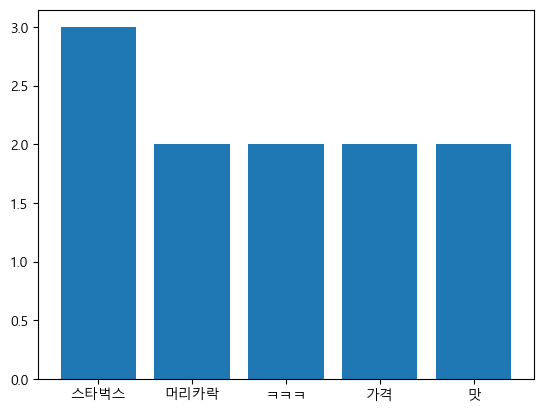

In [42]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic" 
#plt.rc('font', family='Malgun Gothic')
plt.bar(range(len(d1)), d1.values(), align='center')
plt.xticks(range(len(d1)), list(d1.keys()))
plt.show()

## 코드 설명

- L1: 셀 바로 뒤, 같은 화면에서 출력하라는 뜻
- L6: plt.rcParams는 dictionary 형식으로 그래프의 크기, 폰트, 색, 그리드 등 설정을 변경한다. 줄여서 plt.rc()를 사용해도 된다.

```
plt.rcParams["figure.figsize"] = (10, 6)  # Set the default figure size
plt.rcParams["font.family"] = "sans-serif"  # Set the default font family
plt.rcParams["axes.grid"] = True  # Show grid lines on plots
plt.rcParams["axes.labelsize"] = 12
또는
plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='NanumMyeongjo')
```

- 가능한 font list 확인하려면

```
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)
```

* 파일 버전 ds1_1_wordcount.py
* 한글이 섞여 있으므로 '#coding:utf-8'을 넣어 인코딩을 정의한다.

In [24]:
%matplotlib inline

In [25]:
%%writefile src/ds1_1_wordcount.py
import matplotlib
import matplotlib.pyplot as plt 

sent = u"""진동벨 좀 만들었으면 좋겠다 2층 매장이라 결국 손님 어딨는지는 몰라서 그저 열심히 목터져가며 소리지르는게 전부임 넘 안쓰럽다 그리고 픽업 장소 옆은 시장통임 북적북적
옆 동네 스타벅스 왔다,,, 무려 노트북 들고,,,,!
스타벅스 있다가 나오면 머리카락 커피향기 배는데 안에 있을 땐 모르겠다가 밖에 나와서 머리카락 흔들릴 때마다 느껴지는 거 너무 좋아
저도...마싯는 커피 마시고 싶어여...훌젹 ㅋㅋㅋ 막 요즘 로스팅 전문 하는 데 가서 마시구 싶고 그러네요 근데 어떤데 있는질 몰라서... 합정 상수 부근 쪽 찾아볼가여?
예전에는 스타벅스 비싸다는 인식 있었는데 카페 가격 다 똑같은듯
저도 그렇게 섬세한 입맛 아니라서 ㅋㅋ 가격 맛 찾아낼 수 있을지는 의문이네요...ㅋㅋㅋ 평범한  곳 가도 갠찬아여! 엄청 맛 없는 것만 아니라면야 ㅋㅋㅋ"""

def do():
    d = dict()
    for c in sent.split():
        if c not in d:
            d[c]=1
        else:
            d[c]=d[c]+1
    d1 = dict()
    for key, value in d.items():
        if value>1:
            d1[key]=value
            print(key, value)
    plt.bar(range(len(d1)), d1.values(), align='center')
    plt.xticks(range(len(d1)), list(d1.keys()))
    plt.show()

def main():
    do()

if __name__=="__main__":
    main()

Overwriting src/ds1_1_wordcount.py


In [34]:
!python3 src/ds1_1_wordcount.py

스타벅스 3
머리카락 2
ㅋㅋㅋ 2
가격 2
맛 2
Figure(640x480)


## 문제: 단독형 클러스터 구성하기

굳이 구성하지 않아도 단독형 클러스터(standalone cluster)는 기본으로 실행된다.

게다가 PIP pyspark를 설치하는 경우는 설정 파일(conf 디렉토리 밑에 있는)도 제공되지 않으니 애당초 가능하지 않을터이다.
완전설치를 한 경우에만 가능한 선택이다.

단독형 클러스터는 별도의 클러스터 구성이 필요하지 않고 따라서 클러스터 관리자(Mesos, YARN 등)를 적용하지 않고, 마스터와 워커가 동일한 컴퓨터에서 동작한다. 주로 개발 및 테스트 목적으로 사용되며, 로컬 머신에서 스파크 애플리케이션을 실행하고 디버깅하는 데 편리하다.

### 1. spark-env.sh 설정:

Spark를 단독형으로 실행하기 위해서는, 설치하면서 따라온 배치파일을 활용하면 된다.
Spark의 conf 폴더에 있는 spark-env.sh.template 파일을 복사하여 spark-env.sh 파일을 생성한다. 이 파일을 편집하여 다음과 같은 환경 변수를 설정한다.

```
export SPARK_MASTER_HOST=your_master_host --> 마스터 노드의 호스트 명이나 IP 주소를 적는다. localhost를 적는다.
export SPARK_MASTER_PORT=7077             --> 기본 포트 7077 
export SPARK_MASTER_WEBUI_PORT=8080       --> 웹 UI 기본 포트 8080

# Spark 슬레이브 설정 (옵션)
export SPARK_WORKER_CORES=2
export SPARK_WORKER_MEMORY=2g
```

### 2. 마스터 및 워커 설정

conf 폴더의 slaves.template 파일을 복사하여 slaves 파일을 생성한다. 이 파일에는 클러스터에 포함될 워커 노드의 호스트 이름을 한 줄에 하나씩 적어준다. 기본으로 localhost가 적혀있다 (slaves 파일의 맨 끝을 보라).

### 3. 마스터 노드에서 Spark 마스터를 시작한다

마스터 노드에서 명령창을 열어 다음 명령어를 실행한다.

```python
> sh $SPARK_HOME/sbin/start-master.sh
```

브라우저에서 http://<your_master_ip>:8080으로 웹 UI에 접속하여, 마스터의 상태를 확인할 수 있다.

### 4. 워커 노드에서 Spark 워커를 시작한다

슬레이브 노드에서 다음 명령을 실행하여 슬레이브를 시작합니다. 여러 대의 슬레이브를 추가할 수 있다.

```python
> sh $SPARK_HOME/sbin//start-slave.sh spark://IPADRESS_OF_YOUR_MASTER_SYSTEM:7077
```

### 5. 작업 실행

이제 Spark 클러스터가 설정되었으므로, Spark 작업을 클러스터에서 실행할 수 있다. 예를 들어, spark-shell을 실행하여 Spark 쉘을 시작해보자.

```
./bin/spark-shell --master spark://your_master_host:7077
```

### 6. 마스터 및 워커 중지

작업을 마치면 워커와 마스터를 중지합니다:

```
./sbin/stop-worker.sh
./sbin/stop-master.sh
```


* 쉘 명령어

sbin디렉토리의 shell | 설명
----------|----------
start-master.sh, stop-master.sh | 마스터를 시작 (종료)
start-slaves.sh, stop-slaves.sh | 각 노드의 슬레이브를 시작 (종료)
start-all.sh, stop-all.sh | 마스터, 슬레이브를 모두 시작 (종료)

## 1.9 Spark 설정

단독형은 굳이 설정을 변경할 필요가 적지만, 서버형으로 사용하려면 클러스터 구성(클러스터 매니저를 local, yarn, mesos, spark://host:port 등으로 설정), 메모리 할당 (드라이버와 실행자), 로깅 등 다양한 설정을 변경할 수 있다.

Spark 설정은 다음 2가지 방법으로 할 수 있다.

* (1) 프로그램 코드 내부에서 SparkConf() 객체를 사용해서 설정 값을 설정한 후, SparkSession.builder.config(conf).getOrCreate()와 같이 Spark 세션을 생성한다. 또한 스크립트 내에서 --conf 명령행 옵션을 사용하여 설정을 전달할 수도 있다.

* (2) 프로그램 외부에서도 할 수 있다. ```conf/``` 디렉토리 (다른 디렉토리에 파일이 있다면, 'SPARK_CONF_DIR'를 수정하면 된다)에 주어진 spark-defaults.conf, spark-env.sh, log4j.properties 등 설정파일의 환경변수를 변경해서 할 수 있다

### (1) SparkConf 설정의 변경

몇 가지 설정을 확인해 보자.

In [21]:
import pyspark
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .getOrCreate()

In [22]:
print ("Spark version \t: {}".format(spark.version))
print ("Spark App \t: {}".format(spark.conf.get('spark.app.name')))
print ("Spark Master \t: {}".format(spark.conf.get('spark.master')))
print ("Spark Host \t: {}".format(spark.conf.get('spark.driver.host')))

Spark version 	: 3.4.1
Spark App 	: myApp
Spark Master 	: local
Spark Host 	: 192.168.219.151


#### 모든 설정

하나씩 설정을 읽고 있는데 (```spark.conf.get()```), 모든 설정을 가져오기 위해서는:

- ```spark.sparkContext.getConf()```를 통해 SparkConf 객체를 얻어오고
- SparkConf의 .getAll()를 호출하면,
- 설정을 dictionary 형식으로 읽을 수 있다 (Spark 2.1 이상부터 가능)

또는 getConf() ==> ```_conf```로 바꿔서 ```spark.sparkContext._conf.getAll()```라고 적어도 동일한 의미의 명령이다 (```_conf``` 앞에 언더스코어(```_```)가 있다는 점에 유의).

In [ ]:
spark.sparkContext.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.name', 'myApp'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.port', '58500'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.sql.warehouse.dir',


#### 설정의 변경

```spark.sparkContext.getConf().set()``` (또는 ```spark.sparkContext._conf.set()```) 함수로 설정을 변경할 수 있다.

java.net.BindException이 발생한 경우
process를 죽이거나, 로컬주소가 바인딩이 되어있지 못해서 그렇다.

In [25]:
spark.sparkContext.getConf().set("spark.driver.bindAddress", "127.0.0.1")

In [26]:
spark.sparkContext._conf.set("spark.executor.memory", '8g')
spark.sparkContext._conf.set('spark.app.name', 'jsl')
spark.sparkContext._conf.set('spark.executor.cores', '3')
spark.sparkContext._conf.set('spark.cores.max', '3')
spark.sparkContext._conf.set("spark.driver.memory",'8g')

In [ ]:
spark.sparkContext.getConf().getAll()

```
출력 중 일부를 붙여넣었는데, 설정의 변경이 성공적으로 적용되고 있다.
[('spark.master', 'local'),
 ('spark.app.name', 'jsl'),   ===> 최초 'myApp' -> 'jsl' 변경
 ('spark.executor.id', 'driver'),
 ('spark.driver.port', '58500'),
 ('spark.cores.max', '3'),
 ('spark.driver.bindAddress', '127.0.0.1'),
 ('spark.driver.memory', '8g'),
 ('spark.executor.memory', '8g'),
 ('spark.executor.cores', '3'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.host', '192.168.219.151'),
 ('spark.ui.showConsoleProgress', 'true'),
```

#### log 설정의 변경

로그의 수준을 ALL, DEBUG, ERROR, FATAL, INFO, OFF, TRACE, WARN 선택하여 설정할 수 있다.

```
conf.set("spark.driver.log.level", "WARN") // Set driver log level
conf.set("spark.executor.log.level", "ERROR") // Set executor log level
```

또는 log4j.properties를 사용해서 변경할 수 있다.

```python
> cp conf/log4j.properties.template conf/log4j.properties  원본 파일을 보존하기 위해 복사해서 사용한다.
> vim conf/log4j.properties
log4j.rootCategory=ERROR, console
```


#### jar 파일의 추가

Spark를 사용하다보면 라이브러리를 추가해야 할 필요도 생겨나게 된다.

외부 JAR 파일을 사용하려면 ```.jars``` 또는 ```.extraClasspath```에 추가한다.

- spark.driver.extraClasspath는 드라이버, spark.executor.extraClasspath는 워커의 클래스패스(classpath)를 확장할 때,
- spark.jars는 Spark는 모든 클러스터 노드에 적용할 경우 사용한다.
- ```spark.jars.packages```를 사용하면 Maven 또는 Ivy와 같은 의존성 관리 시스템을 사용하여 패키지를 자동으로 다운로드하고 설치할 수 있다.

(1) 로컬에 다운로드한 jar 파일을 추가할 수 있다.

SparkConf의 "spark.jars"에 컴마로 구분된 jar 파일 목록의 classpath를 지정할 수 있다. 그리고 이를 SparkSession을 생성할 때 적용할 수 있다.

```
myConf=pyspark.SparkConf().set("spark.jars", "/path/to/sqlite-jdbc.jar")
```

또는 SparkSession이 생성하고 난 후, 동적으로 jar를 추가할 수 있다.
spark.sparkContext._conf.set('spark.jars', "/path/to/sqlite-jdbc.jar")

아예 설정파일 'spark-default.conf'을 수정해서 추가할 수 있다.

(2) 또는 maven 형식의 jar 파일을 추가할 수 있다.

실제로 설치하지 않고, 명명규칙에 따라, maven에서 하는 것과 같이, 콜론으로 구분해, 패키지명과 라이브러리를 버전정보와 같이 적어주면 된다. https://spark-packages.org 를 방문해서 찾아서 사용하면 된다. 

* 단계 1: Spark Package url https://spark-packages.org/ 을 검색해서 jar를 찾아낸다. Spark Package의 명칭은 maven에서 명명하는 방식에 따라, 예를 들면, ```org.mongodb.spark:mongo-spark-connector_2.10:2.0.0```라고 적어준다. 이 명칭은 (1) groupId 패키지 명칭, (2) artifactId (jar 명칭. 확장자는 생략한다), (3) version (버전 정보, x.x.x)를 콜론(:)으로 구성된다.

* 단계 2: 'spark-default.conf' 설정 파일을 수정하거나, SparkConf()를 수정한다.
```--jars```는 로컬로 다운로드한 jar 파일을 추가할 때 사용하고, maven jar는 ```spark.jars.packages```에 추가한다 (복수의 jar는 컴마로 구분한다). 

```
pyspark.SparkConf().set("spark.jars.packages", "group:artifact:version").
```

또는 pyspark, spark-submit 하면서 추가할 수도 있다.

* pyspark

```
$ bin/pyspark --py-files lib/graphframes.jar --jars lib/graphframes.jar 
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.0
      /_/

Using Python version 2.7.12 (default, Jul  1 2016 15:12:24)
SparkContext available as sc, HiveContext available as sqlContext.
>>> from graphframes import *
```

* spark-submit --packages

```python
./bin/spark-submit src/ds_spark_dataframe.py \
   --packages graphframes:graphframes:0.1.0-spark1.6
```

* addJar() (가능한지 테스트)
addJar() 함수를 사용하려면 SparkSession 객체가 이미 생성되어 있어야 하고, jar 파일을 classpath에 추가할 수 있다.

```python
spark.addJar("/path/to/custom-library.jar")  외부 jar 파일을 추가
spark.addFile("/path/to/some-file.txt")      외부 파일을 추가
```


## 문제 S-4: sqlite를 사용하기 위한 jar를 추가

sqlite 데이터베이스를 사용하기 위해 Spark에 jar를 추가해보자.

### 해결

sqlite는 Spark Package 사이트에서 제공되고 있지 않다. 필요한 jar를 다운로드하고 'spark.driver.extraClassPath'에 추가하자.

* 단계 1: sqlite-jdbc-x.x.x.jar를 다운로드

* 단계 2: 설정파일 conf/spark-defaults.conf 수정
    * 여러 jar를 추가할 경우, 리눅스는 ':' 윈도우 ';'로 분리하여 추가한다.
    * 필요한 경우 'spark.executor.extraClassPath'도 추가할 수 있다.

```python
$vim conf/spark-defaults.conf 
spark.driver.extraClassPath /home/jsl/Code/git/bb/jsl/pyds/lib/sqlite-jdbc-3.14.2.jar
```

확인하기 위해서는, ```conf.get('spark.driver.extraClassPath')```

## 문제 S-3: MongoDB를 사용하기 위한 jar를 추가

Spark에서 데이터를 저장하기 위해 MongoDB를 연결해야 한다고 하자. Spark Package의 mongodb를 찾아, 설정 파일에 추가하자 (설명 참조, https://docs.mongodb.com/spark-connector/)

### 해결

우선, MongoDB가 설치되어 서버가 실행되어 있어야 한다. 올바른 jar 버전을 사용하기 위해 MongoDB의 버전을 확인한다.

In [3]:
!mongod --version

db version v2.6.10
2017-04-15T06:05:02.080+0900 git version: nogitversion
2017-04-15T06:05:02.080+0900 OpenSSL version: OpenSSL 1.0.2g  1 Mar 2016


* 단계 1: Spark Package 검색

Spark Package https://spark-packages.org/ 에서 mongo-spark를 검색하여, 자신의 Spark Version, Scala Version을 확인해서 맞는 jar를 선택한다. 예를 들어, mongo-spark-connector_2.10을 사용하려면 Scala 2.10.x이 필요하다.

* 단계 2: 설정파일 conf/spark-defaults.conf 수정

MongoDB<3.2인 경우 spark.mongodb.input.partitioner가 필요하다.

```python
$vim conf/spark-defaults.conf 
spark.jars.packages=org.mongodb.spark:mongo-spark-connector_2.10:1.1.0
spark.mongodb.input.partitioner=MongoPaginateBySizePartitioner
```

* 단계 3: 설정 넣어서 SparkSession 생성

```python
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/myDB.ds_spark_df_mongo") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/myDB.ds_spark_df_mongo") \
    .getOrCreate()
```

* pyspark로 사용할 경우, --conf에 적어준다.

```python
./bin/pyspark --conf "spark.mongodb.input.uri=mongodb://127.0.0.1/test.myCollection?readPreference=primaryPreferred" \
              --conf "spark.mongodb.output.uri=mongodb://127.0.0.1/test.myCollection" \
              --packages org.mongodb.spark:mongo-spark-connector_2.10:1.1.0
```

* 오류 DefaultMongoPartitioner: MongoDB version < 3.2 detected. 설정에 추가
```python
spark.mongodb.input.partitioner=MongoPaginateBySizePartitioner
```

In [4]:
spark.conf.get('spark.jars.packages')

graphframes:graphframes:0.4.0-spark2.0-s_2.11,org.mongodb.spark:mongo-spark-connector_2.10:2.0.0,com.databricks:spark-csv_2.11:1.5.0
